In [2]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #model evaluation

%matplotlib inline

# 1. GOAT

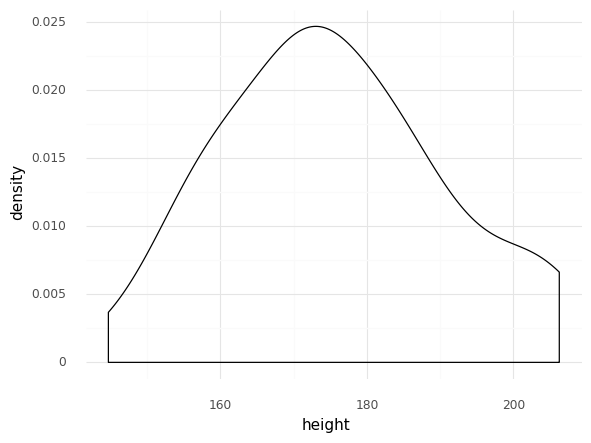

<ggplot: (339180103)>

In [11]:
# DATA
hw = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/heightWeight.csv")
hw.head()

(ggplot(hw, aes(x = "height")) + geom_density() + theme_minimal())


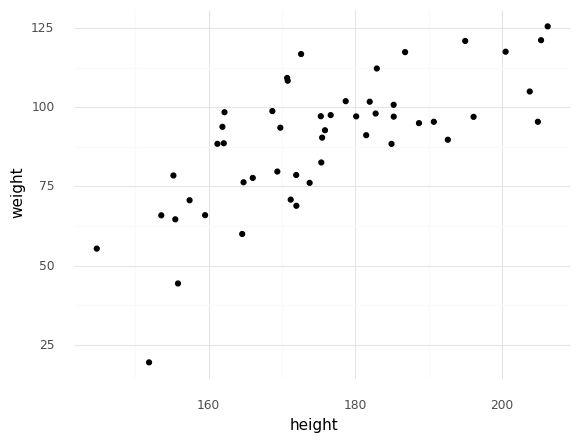

<ggplot: (-9223372036515562899)>

In [12]:
# age by height

(ggplot(hw, aes(x = "height", y = "weight")) + geom_point() + theme_minimal())

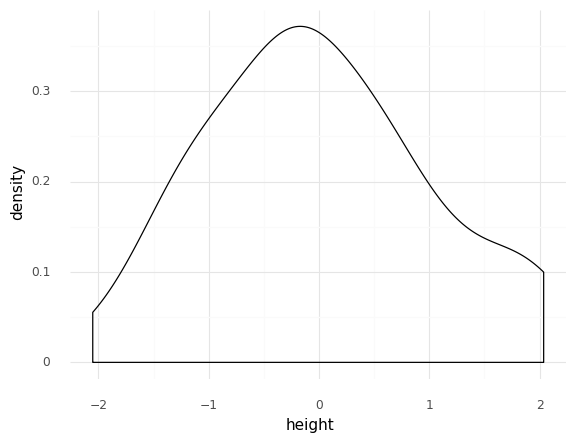

<ggplot: (339242216)>

In [16]:
z = StandardScaler()

# calc mean and sd
z.fit(hw[["height", "weight", "age"]])

# calc z
hw[["height", "weight", "age"]] = z.transform(hw[["height", "weight", "age"]])

hw.head()
(ggplot(hw, aes(x = "height")) + geom_density() + theme_minimal())


Notice that Z-scoring doesn't change the shape of the data, just the scale (x-axis) it's measured with. Similarly, see below to see that z scoring also doesn't change the relationship between two variables. This means that while z scoring is useful for putting variales on similar scales it will NOT impact the shape of the data, nor their relationships with other variables.

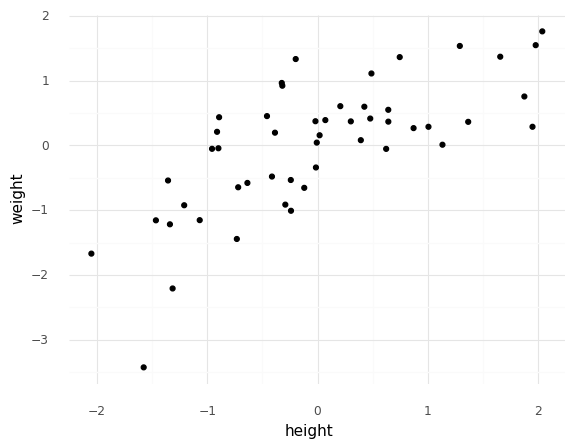

<ggplot: (339243233)>

In [17]:
# height by age z
(ggplot(hw, aes(x = "height", y = "weight")) + geom_point() + theme_minimal())

# Amazon Books (sklearn)

In [3]:
# Data
ama = pd.read_csv("amazon-books.txt",
                 sep = "\t")

ama.head()

,Title,Author,List Price,Amazon Price,Hard/ Paper,NumPages,Publisher,Pub year,ISBN-10,Height,Width,Thick,Weight (oz)
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010.0,1605506249,7.8,5.5,0.8,11.2
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008.0,1416564195,8.4,5.5,0.7,7.2
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995.0,486285537,8.3,5.2,0.3,4.0
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008.0,0061564893,8.8,6.0,1.6,28.8
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011.0,0307265722,8.0,5.2,1.4,22.4


In [5]:
# check null
ama.isnull().sum()


Title           0
Author          1
List Price      1
Amazon Price    0
Hard/ Paper     0
NumPages        2
Publisher       1
Pub year        1
ISBN-10         0
Height          4
Width           5
Thick           1
Weight (oz)     9
dtype: int64

In [6]:
ama.shape

(325, 13)

In [8]:
# drop missing

ama = ama.dropna()
ama.shape

(310, 13)

In [13]:
ama.describe()

,List Price,Amazon Price,NumPages,Pub year,Height,Width,Thick,Weight (oz)
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,17.934516,12.587645,330.577419,2002.035484,8.130968,5.553548,0.890000,12.427742
std,13.287255,11.578859,159.017713,10.732796,0.868884,0.845416,0.355534,6.622459
min,1.500000,0.770000,24.000000,1936.000000,5.100000,4.100000,0.100000,1.200000
25%,13.425000,8.537500,208.000000,1998.000000,7.900000,5.200000,0.600000,7.800000
50%,15.000000,10.200000,320.000000,2005.000000,8.100000,5.300000,0.800000,11.200000
75%,18.000000,12.240000,403.750000,2010.000000,8.400000,5.800000,1.100000,16.000000
max,139.950000,139.950000,896.000000,2011.000000,12.100000,9.300000,2.000000,35.200000


In [26]:
ama1=ama[["List Price","Amazon Price","NumPages","Pub year","Height","Width","Thick","Weight (oz)"]]

## Explore

In [20]:
import plotly.express as px
import cufflinks as cf
#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
cf.go_offline()

#To display the plots
%matplotlib inline
from ipywidgets import interact
import plotly.io as pio

pio.renderers.default = 'notebook'

import warnings
warnings.filterwarnings("ignore")

In [27]:
def column_histogram(col):
    fig = px.histogram(ama1,
                       x=col,
                       #nbins=80,
                       )
    fig.show()
cols = ama1.columns

interact(column_histogram,col=cols);

interactive(children=(Dropdown(description='col', options=('List Price', 'Amazon Price', 'NumPages', 'Pub year…

In [28]:
def column_boxer(col):
    ama1[col].iplot("box")
cols = ama1.columns    

interact(column_boxer,col = cols);

interactive(children=(Dropdown(description='col', options=('List Price', 'Amazon Price', 'NumPages', 'Pub year…

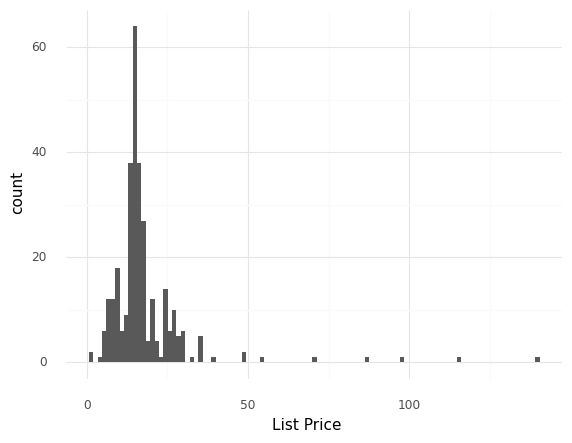

<ggplot: (133627938684)>

In [17]:
(ggplot(ama, aes(x = "List Price")) + geom_histogram() + theme_minimal())

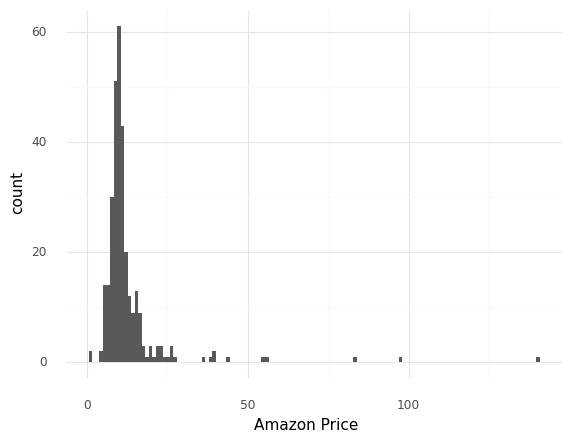

<ggplot: (133627940979)>

In [18]:
(ggplot(ama, aes(x = "Amazon Price")) + geom_histogram() + theme_minimal())

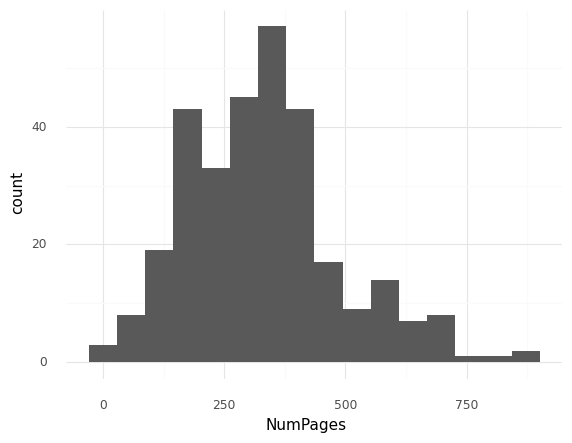

<ggplot: (-9223372036515473222)>

In [24]:
(ggplot(ama, aes(x = "NumPages")) + geom_histogram() + theme_minimal())

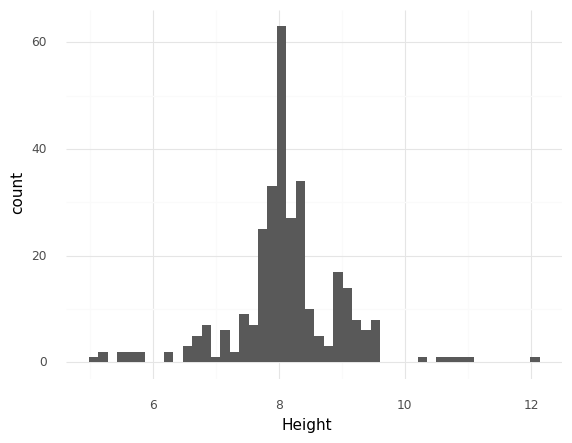

<ggplot: (339285810)>

In [25]:
(ggplot(ama, aes(x = "Height")) + geom_histogram() + theme_minimal())

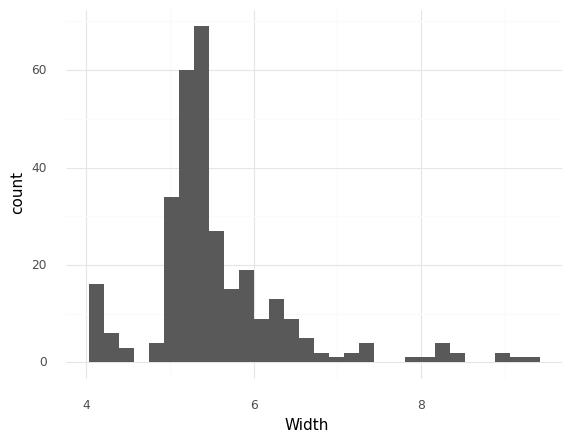

<ggplot: (-9223372036515481782)>

In [26]:
(ggplot(ama, aes(x = "Width")) + geom_histogram() + theme_minimal())

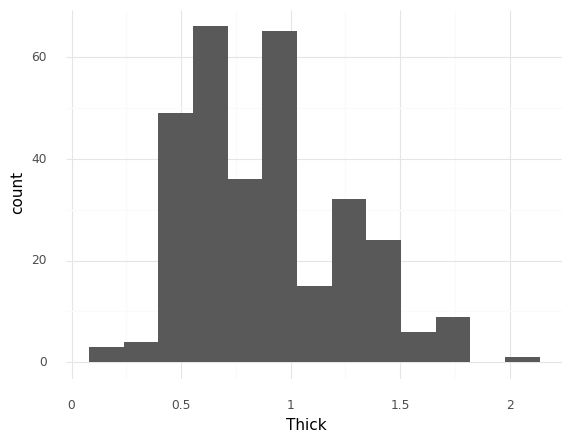

<ggplot: (339350683)>

In [27]:
(ggplot(ama, aes(x = "Thick")) + geom_histogram() + theme_minimal())

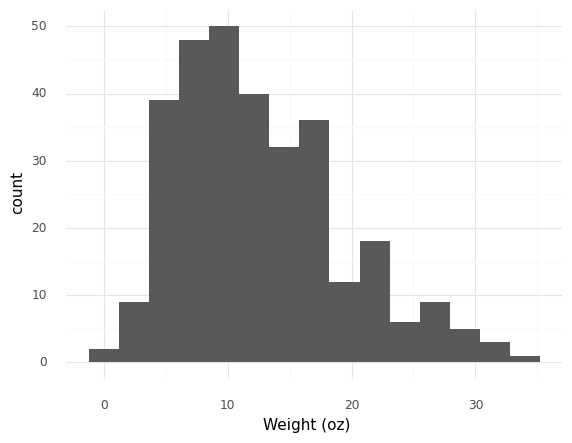

<ggplot: (339383651)>

In [28]:
(ggplot(ama, aes(x = "Weight (oz)")) + geom_histogram() + theme_minimal())

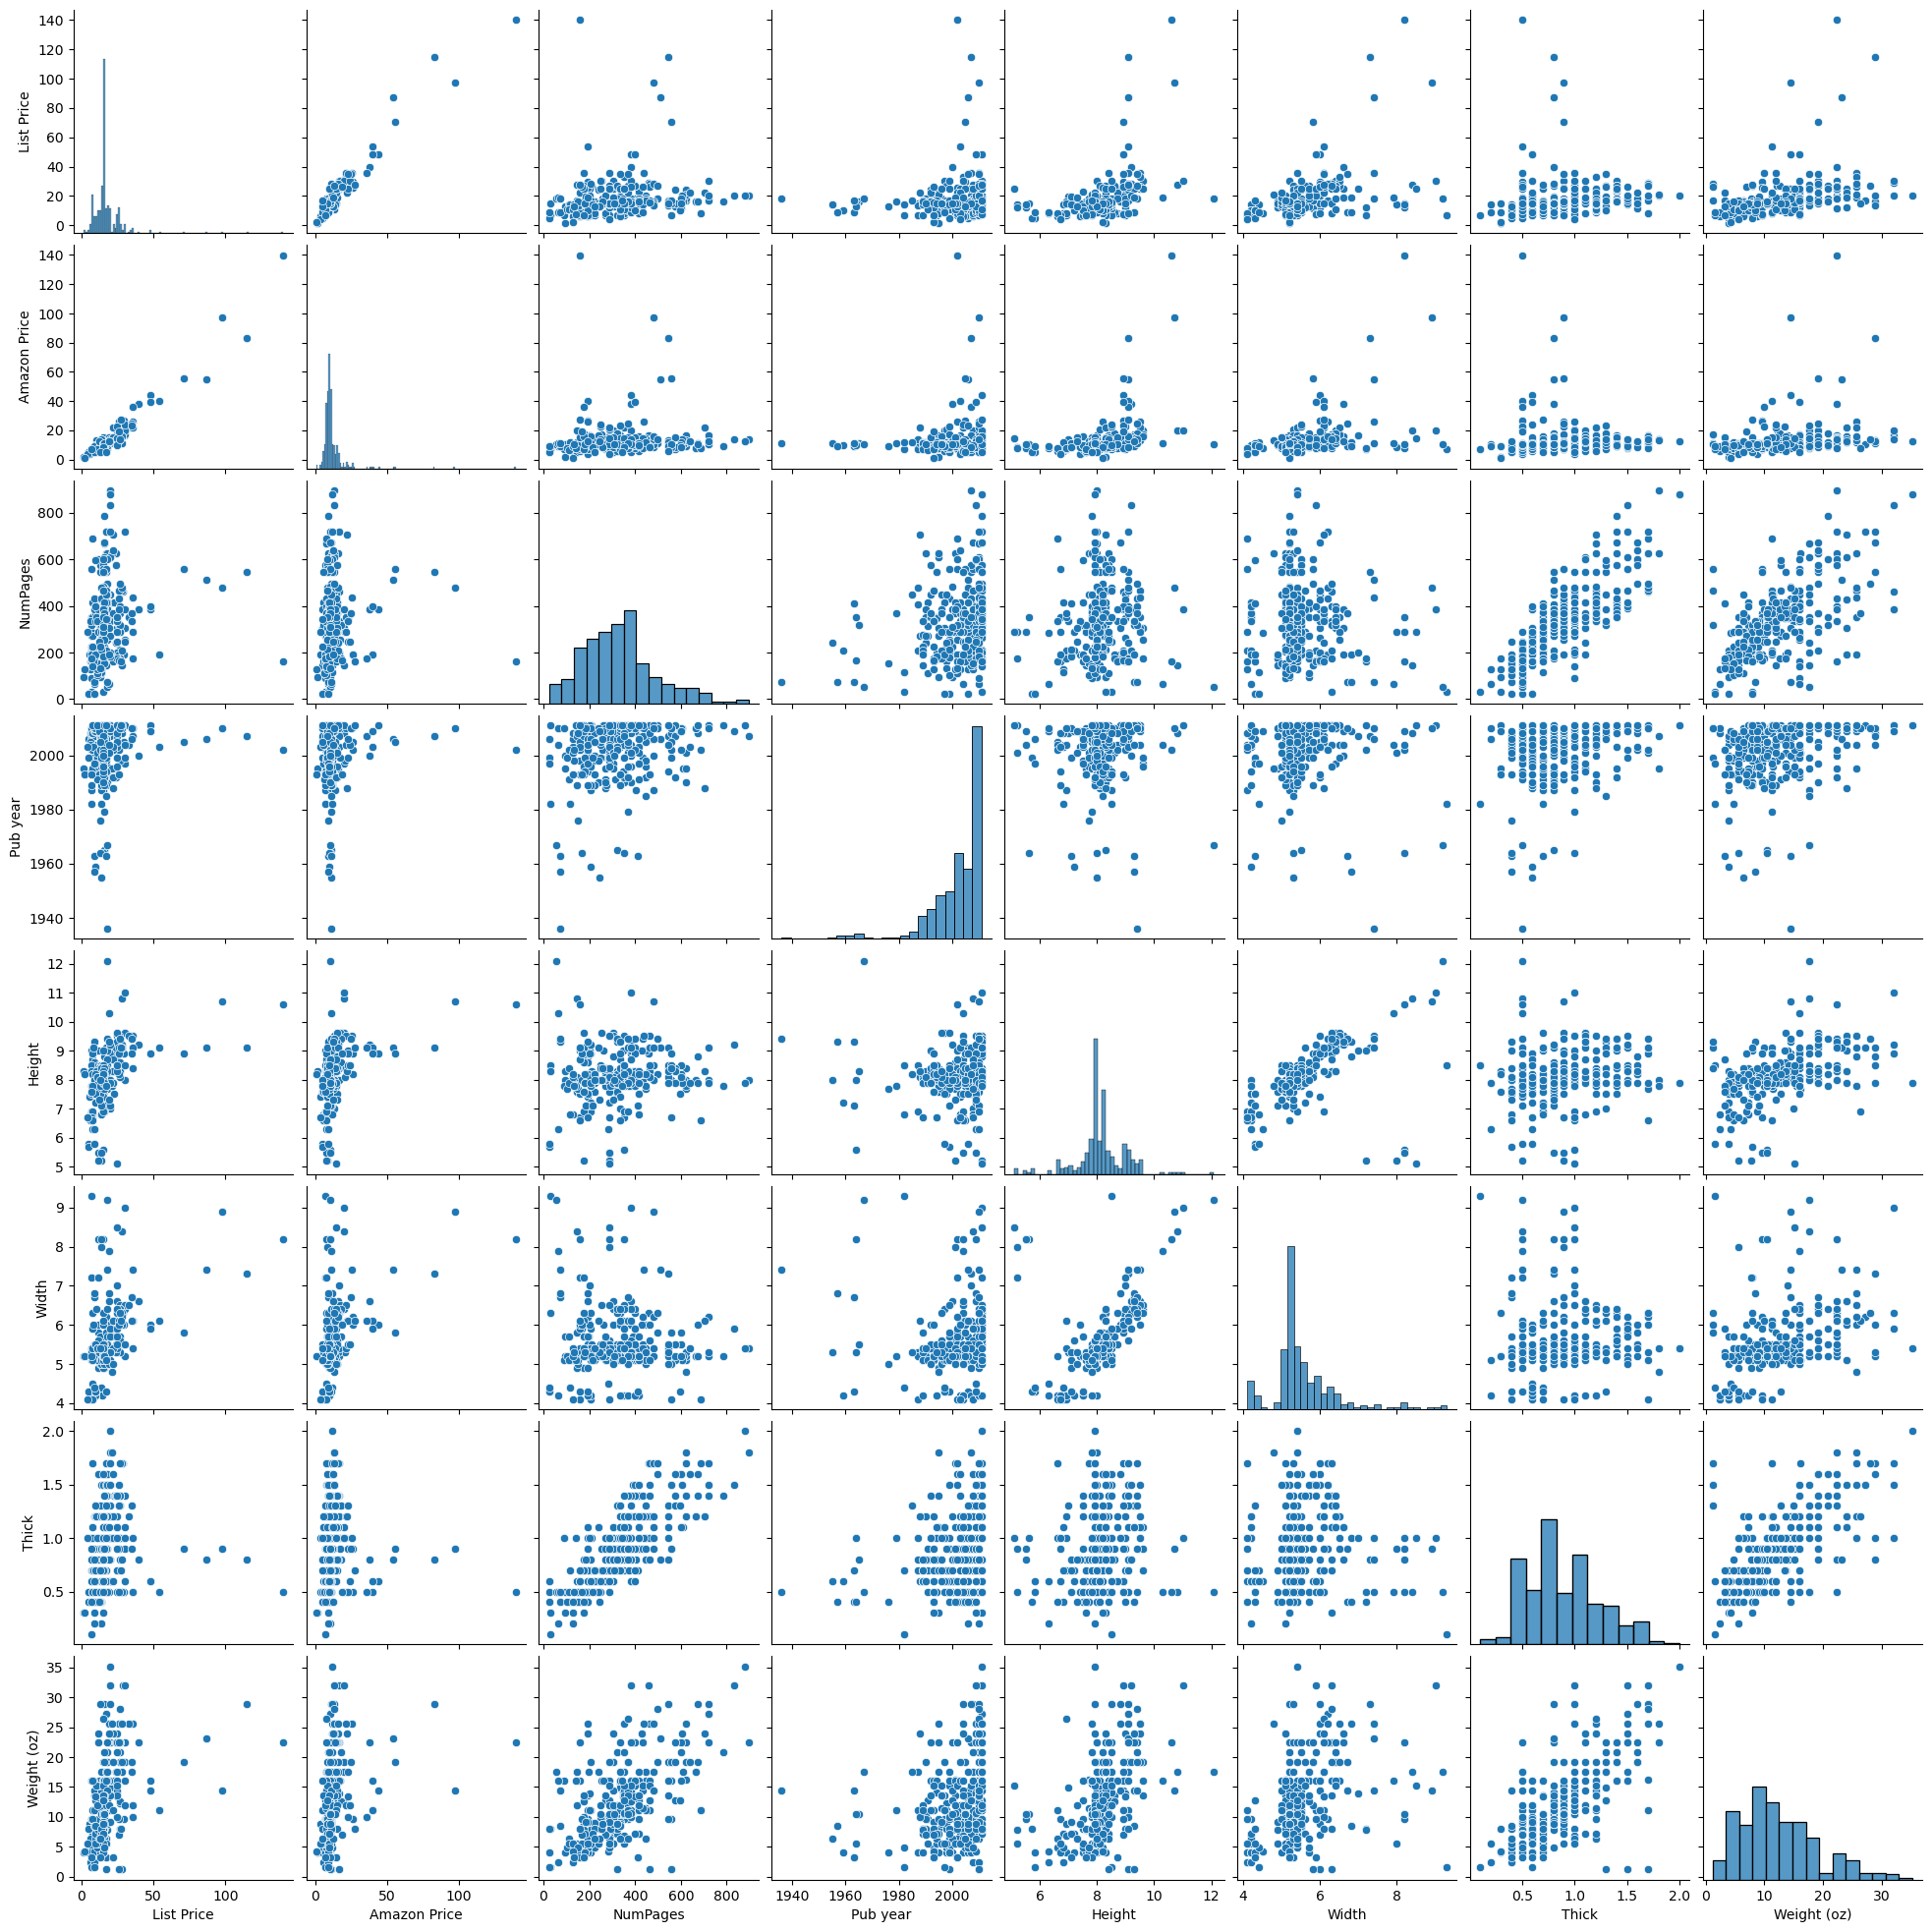

In [35]:
sns.pairplot(ama)

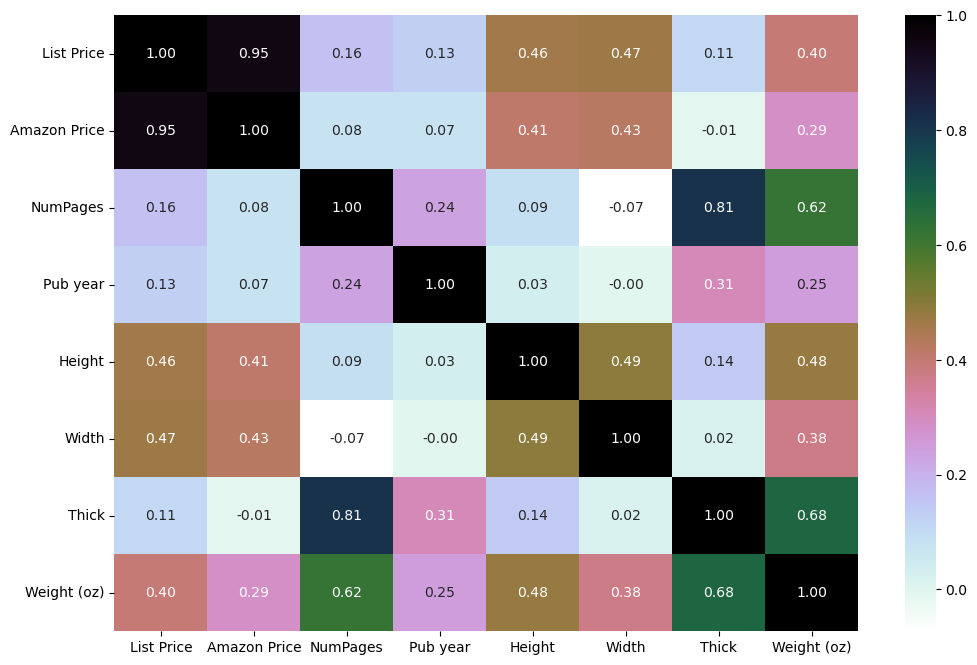

In [36]:
plt.figure(figsize = (12,8))
sns.heatmap(ama.corr(), annot = True, fmt=".2f", cmap="cubehelix_r");

## Model

In [29]:
# set up X and y
predictors = ["List Price", "NumPages", "Weight (oz)", "Thick", "Height", "Width"]

X = ama[predictors]
y = ama["Amazon Price"] #target column

In [30]:
# z score
z = StandardScaler()

z.fit(X)

Xz = z.transform(X)

In [31]:
# create model

LR_Model = LinearRegression()

In [32]:
# fit model
LR_Model.fit(Xz, y)

LinearRegression()

### Model Evaluation

In [39]:
# predict
price_pred = LR_Model.predict(Xz)
price_pred[1:10]

array([10.91587503,  0.64596322,  7.87491152, 21.75388566, 18.09350432,
       13.26001981, 10.59729274, 21.43797602,  9.48174291])

In [40]:
# mse and mae
print(mean_squared_error(y,price_pred ))
print(mean_absolute_error(y,price_pred ))

10.61233860175146
2.1604397487556692


In [41]:
# r2
print(r2_score(y,price_pred ))

0.9205886088486431


In [42]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [43]:
eval_metric(y,price_pred ) # TEST SCORE
#The close RMSE and MSE scores show that our model is a good one

Model testing performance:
--------------------------
R2_score 	: 0.9205886088486431
MAE 		: 2.1604397487556692
MSE 		: 10.61233860175146
RMSE 		: 3.257658453821005


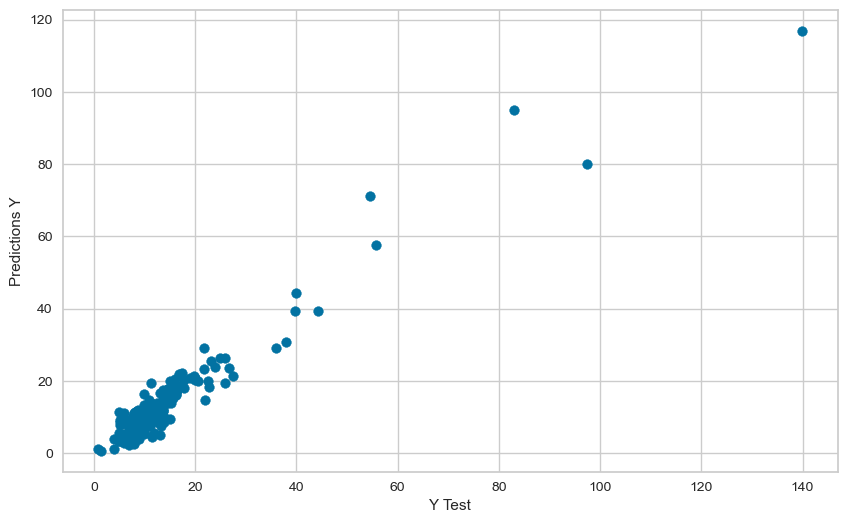

In [46]:
plt.figure(figsize = (10,6))
plt.scatter(y,price_pred)
plt.xlabel('Y Test')
plt.ylabel('Predictions Y');

#### Assumption Checks

First, a note about normality.

https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html
##### Make Data Frame

In [48]:
# make residual plot
assump = pd.DataFrame({"error": y - price_pred,
                      "predicted": price_pred})
assump

,error,predicted
0,-3.506917,8.686917
1,-0.715875,10.915875
2,0.854037,0.645963
3,2.995088,7.874912
4,-4.983886,21.753886
...,...,...
320,0.745593,11.494407
321,6.282997,21.267003
322,-4.022194,9.202194
323,17.540841,79.959159


##### Normality of Residuals

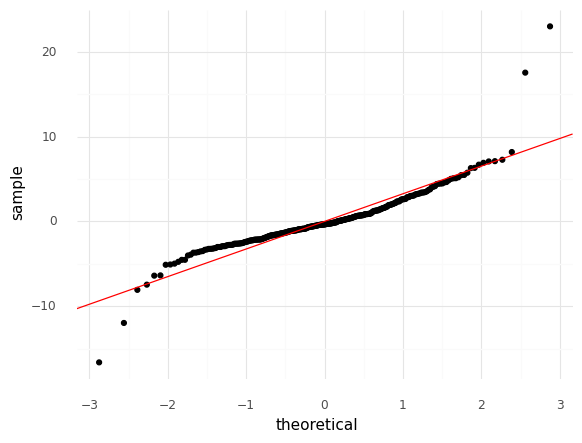

<ggplot: (133637948404)>

In [49]:
(ggplot(assump, aes(sample = "error")) + 
stat_qq() + theme_minimal() + geom_abline(intercept = 0, slope = np.std(assump["error"]), color = "red"))

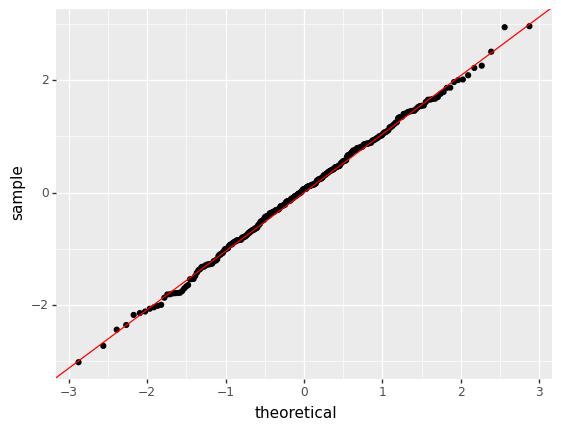

<ggplot: (133637992045)>

In [50]:
assump["random1"] = np.random.normal(0,1,len(y))
(ggplot(assump, aes(sample = "random1")) + stat_qq() + geom_abline(intercept = 0, slope = np.std(assump["random1"]), color = "red"))

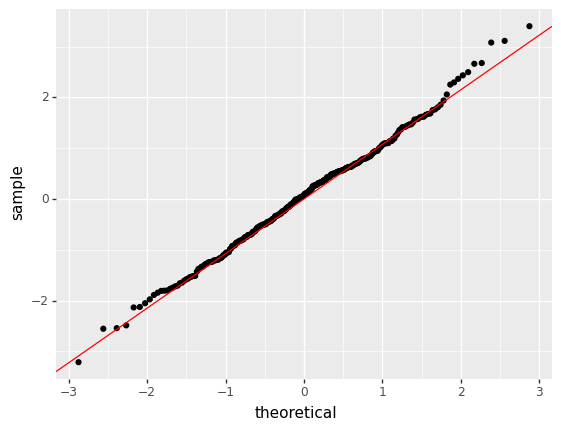

<ggplot: (133637944721)>

In [51]:
assump["random2"] = np.random.normal(0,1,len(y))
(ggplot(assump, aes(sample = "random2")) + stat_qq() + geom_abline(intercept = 0, slope = np.std(assump["random2"]), color = "red"))

##### Homoskedasticity and Omnibus Linearity

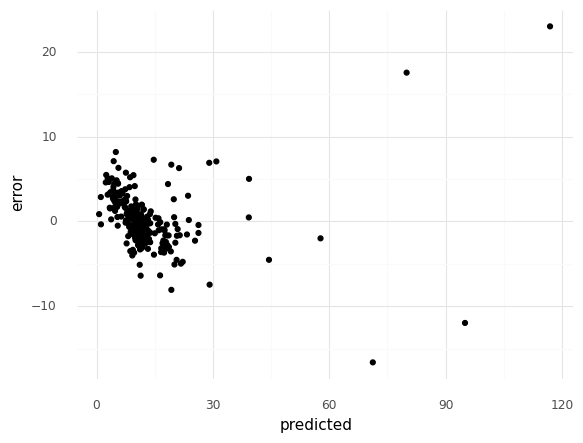

<ggplot: (339094753)>

In [43]:
(ggplot(assump, aes(x = "predicted", y = "error")) + geom_point() + theme_minimal())
# what are we looking for? Heteroskedasticity and linearity

##### Linearity

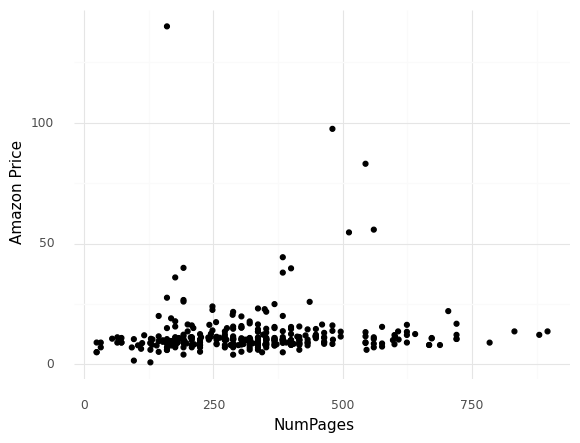

<ggplot: (339279368)>

In [45]:
(ggplot(ama, aes(x = "NumPages", y = "Amazon Price")) + geom_point() + theme_minimal())

### Pull Coefficients

In [54]:
# coef df
coefficients = pd.DataFrame({"Coef": LR_Model.coef_,
                            "Name": predictors})
coefficients = coefficients.append({"Coef": LR_Model.intercept_,
                                   "Name": "intercept"}, ignore_index = True)
coefficients

,Coef,Name
0,11.401887,List Price
1,0.231519,NumPages
2,-0.419686,Weight (oz)
3,-1.159632,Thick
4,-0.098886,Height
5,-0.197179,Width
6,12.587645,intercept
